# Storytelling Data Visualization on Exchange Rates

The data set describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union. 
We'll analyze the exchange rate between the euro and US Dollar (USD). In addition, we'll focus on the period of the COVID-19 pandemic (2020-2021) to discuss how these rates behave during this time. Our goal is to visualize the impact of the pandemic, and possible devaluations and recoveries.

### 1. Exploring the data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline

Importing the dataset:

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

### 2. Data cleaning

#### Changing column names:

In [4]:
exchange_rates.rename({'Period\\Unit:':'Time'}, axis = 1, inplace = True)

In [5]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [6]:
def col_under(df_columns):
       
    list_old = list(df_columns)
    list_middle = []
    list_final =[]
    
    for elm in list_old:
        elm = elm.replace('[', '')
        elm = elm.replace(']', '')
        elm = elm.strip()
        elm = elm.split()
        list_middle.append(elm)
    
    for cos in list_middle:
        if len(cos) == 1:
            list_final.append(cos[0])
        elif len(cos) == 2:
            list_final.append(cos[0] + '_' + cos[1])
        elif len(cos) == 3:
            list_final.append(cos[0] + '_' + cos[1] + '_' + cos[2])
            
    return list_final

In [7]:
new_col = col_under(exchange_rates.columns)
exchange_rates.columns = new_col
exchange_rates

,Time,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


#### Changing Time column to datetime and sorting it according to date.

In [8]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

In [9]:
exchange_rates.sort_values('Time', inplace = True)

In [10]:
exchange_rates.reset_index(drop=True, inplace=True)

In [11]:
exchange_rates

,Time,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


#### Isolating euro to dolar column and cleaning it.

In [12]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


In [13]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.0943     1
0.9404     1
1.5474     1
0.8701     1
1.2062     1
Name: US_dollar, Length: 3528, dtype: int64

In [14]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [15]:
euro_to_dollar.loc[:, 'US_dollar'] = euro_to_dollar.loc[:, 'US_dollar'].astype(float, copy=False)
euro_to_dollar['US_dollar']

C:\Users\dszweda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5694    1.2296
5695    1.2271
5696    1.2338
5697    1.2276
5698    1.2250
Name: US_dollar, Length: 5637, dtype: float64

In [16]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


### 3. Exploratory data analysis

Many factors can influence currency exchange rates, like inflation, interest rates and economic health. Some historical facts had a huge impact on several of these aspects and can modify the exchange rates, for example, the global financial crisis in 2008.
On this project, we want to analyse the COVID-19 pandemic impact, that started in 2020 and we are still facing this problem in 2022.

Exchange rates between the Euro and USD in the whole time period of the dataset (1999-2021).

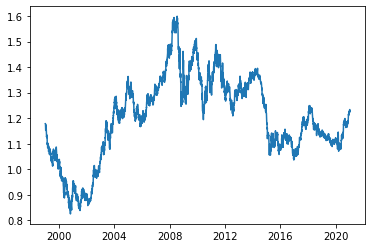

In [17]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

We are interestded in long period exchange rates so we will smooth the plot by using the rolling mean.

In [18]:
euro_to_dollar['rolling_mean'] = euro_to_dollar.loc[:,'US_dollar'].rolling(30).mean()

<ipython-input-18-6dd724efe73f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['rolling_mean'] = euro_to_dollar.loc[:,'US_dollar'].rolling(30).mean()


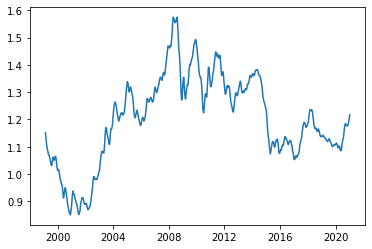

In [19]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

Looking at the ghaph, we can observe the varations during the whole time period. We can see that from the end of 2003, the euro starts to cost more than one US dollar, and keeps this way until 2021.
The Maximum value the Euro gets over the US dollar is 1.599 in July of 2008. And the Minimum value is 0.8252 in October of 2000.

### 4. Explanatory data visualization

We will visualize the change of the euro-dollar rate during the coronavirus pandemic. 
We can show the 2020 data and the 2016-2019 data as a baseline.

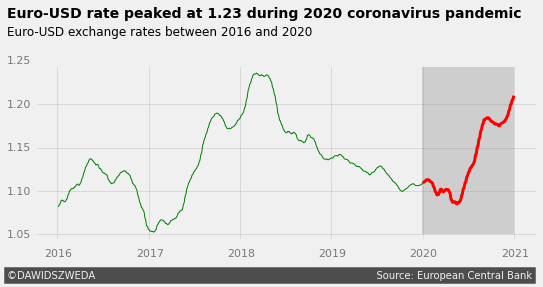

In [20]:
overall_rate = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year < 2021)]
pandemic_rate = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year < 2021)]

# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots(figsize = (8, 3))

ax.plot(overall_rate['Time'], overall_rate['rolling_mean'], color = 'green', linewidth = 1)
ax.plot(pandemic_rate['Time'], pandemic_rate['rolling_mean'], color = 'red', linewidth = 3)

# Add some transparency to the grid
ax.grid(visible=True, alpha=0.2, color='grey')

# Adding a title and a subtitle 
ax.text(16600, 1.3, "Euro-USD rate peaked at 1.23 during 2020 coronavirus pandemic",
        weight='bold')
ax.text(16600, 1.28, 'Euro-USD exchange rates between 2016 and 2020',
        size=12)

# Highlihting the peak of the crisis
ax.axvspan(xmin=18260.0, xmax=18625.0, ymin=0.04,
           alpha=0.3, color='grey')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 16750.0
for year in ['2016', '2017', '2018', '2019', '2020', '2021']:
    ax.text(x, 1.025, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.047   
for rate in ['1.05', '1.10', '1.15', '1.20', '1.25']:
    ax.text(16600.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.05

# Adding a signature
ax.text(16600.0, 1.0, '©DAWIDSZWEDA' + ' '*90 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)


plt.show()

### Conclusion

In this Project, we used the Exchange rate data from the European Central Bank since 1999 until 2021. Our goal was analyse the impact of the COVID-19 in the Exchange rates of the Euro with US Dollar.
 
In the Data Visualization section, we showed a graphic of the EUR/US exchange rates for the 2016-2020 period. We highlighted the firs year of the COVID-19 (2020).